In [76]:
rmse = lambda y, p: np.sqrt(np.mean((y - p) ** 2))
rmse3 = lambda y, p: np.sqrt(np.mean((y - p) ** 3)) # ^3 version

In [ ]:
<h3> NumPy 선형회귀 </h3>

In [132]:
alpha = .001
theta = [.1] *10
#epoch -= 0.2
epoch0 = 3.8

epoch = 3 #default

#epoch +=0.2
epoch2 = 4.2

In [87]:
theta

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

In [133]:
# u,dered_u  r,dered_r
xuu = Xuu.flatten()
print(xuu.shape)
xrr = Xrr.flatten()
print(xrr.shape)

# u,dered_r  dered_u,dered_r
xudr = Xudr.flatten()
print(xudr.shape)
xdudr = Xdudr.flatten()
print(xdudr.shape)

(200004,)
(200004,)
(200004,)
(200004,)


<h5> 1. (u,dered_u) </h5>

In [134]:
# epoch default
# u,dered_u
rmses = []
rmses3 = []
for i in tqdm(range(epoch)):
    for x_i, y_i in zip(xuu, Yuu):
        p_i =  theta[0] + theta[1] * x_i
        theta[0] = theta[0] + alpha * (y_i - p_i)
        theta[1] = theta[1] + alpha * (y_i - p_i) * x_i
    rmses.append(rmse(Yuu, theta[0] + theta[1] * xuu))
    rmses3.append(rmse3(Yuu, theta[0] + theta[1] * xuu))

<h5> 2. (r,dered_r) </h5>

In [135]:
# epoch default
# r,dered_r
rmses_rr = []
rmses3_rr = []
for i in tqdm(range(epoch)):
    for x_i, y_i in zip(xrr, Yrr):
        p_i =  theta[2] + theta[3] * x_i
        theta[2] = theta[2] + alpha * (y_i - p_i)
        theta[3] = theta[3] + alpha * (y_i - p_i) * x_i
    rmses_rr.append(rmse(Yrr, theta[2] + theta[3] * xrr))
    rmses3_rr.append(rmse3(Yrr, theta[2] + theta[3] * xrr))

<h5> 3. (u,dered_r) </h5>

In [136]:
# u,dered_r
rmses_udr = []
rmses3_udr = []
for i in tqdm(range(epoch)):
    for x_i, y_i in zip(xudr, Yudr):
        p_i =  theta[4] + theta[5] * x_i
        theta[4] = theta[4] + alpha * (y_i - p_i)
        theta[5] = theta[5] + alpha * (y_i - p_i) * x_i
    rmses_udr.append(rmse(Yudr, theta[4] + theta[5] * xudr))
    rmses3_udr.append(rmse3(Yudr, theta[4] + theta[5] * xudr))

<h5> 4. (dered_u,dered_r) </h5>

In [137]:
# dered_u,dered_r
rmses_dudr = []
rmses3_dudr = []
for i in tqdm(range(epoch)):
    for x_i, y_i in zip(xdudr, Ydudr):
        p_i =  theta[6] + theta[7] * x_i
        theta[6] = theta[6] + alpha * (y_i - p_i)
        theta[7] = theta[7] + alpha * (y_i - p_i) * x_i
    rmses_dudr.append(rmse(Ydudr, theta[6] + theta[7] * xdudr))
    rmses3_dudr.append(rmse3(Ydudr, theta[6] + theta[7] * xdudr))

In [138]:
theta

[1.0399023588577836,
 0.9398022599435804,
 0.46868868679469644,
 0.9711903202505606,
 2.043848778599271,
 0.8215400700167133,
 1.2456954598870662,
 0.8688632839142713,
 0.1,
 0.1]

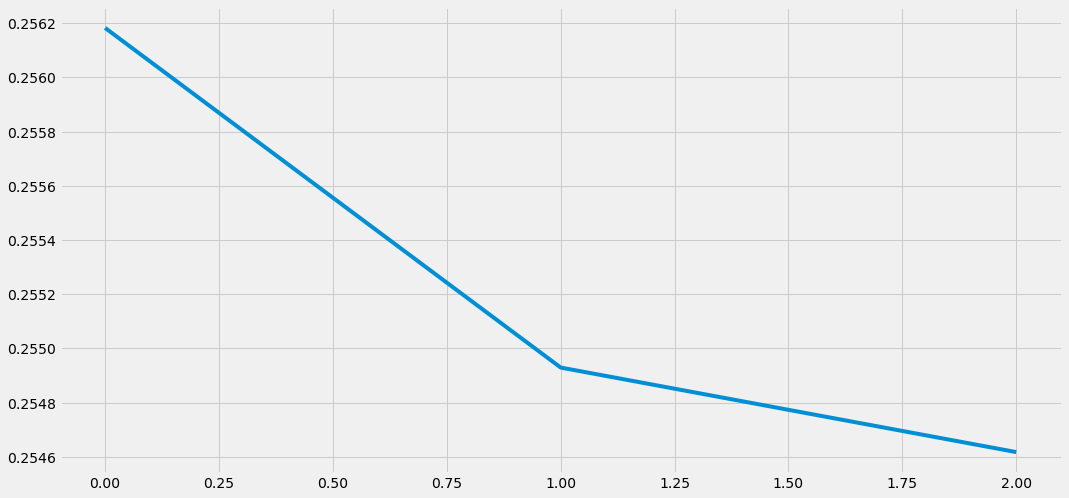

In [140]:
rmses
plt.plot(rmses)

In [143]:
print(rmses)
print(rmses_rr)
print(rmses_udr)
print(rmses_dudr)

[0.25618215910731906, 0.25492967552380746, 0.25461791287963526]
[0.17722623372983123, 0.17782429082699736, 0.17817927485069057]
[0.8465654452038702, 0.8448371329779669, 0.8444061162478157]
[0.8081519533482289, 0.8082041661154766, 0.8083995860943274]


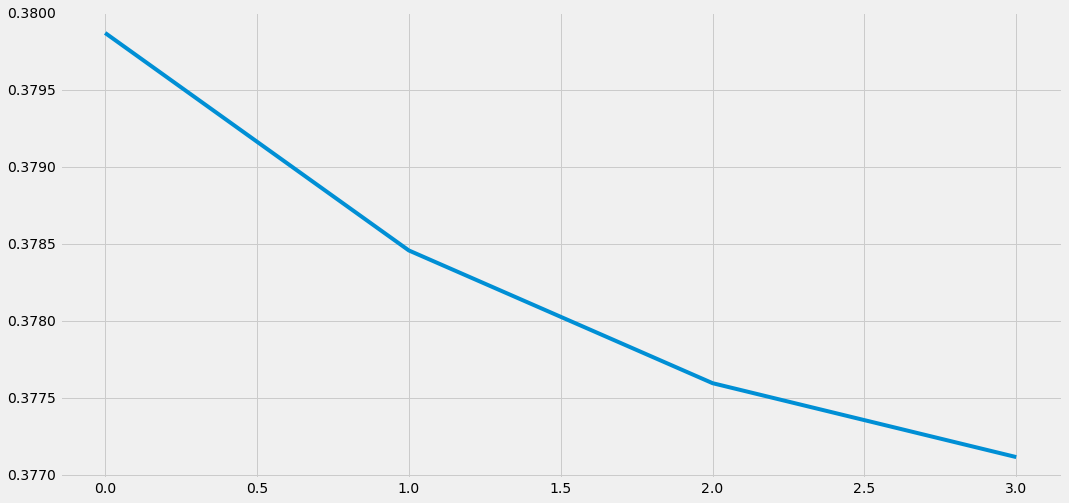

In [105]:
plt.plot(rmses3)

<h4> 4개의 인자를 학습한 시각화  </h4>

Text(0, 0.5, 'dered_u')

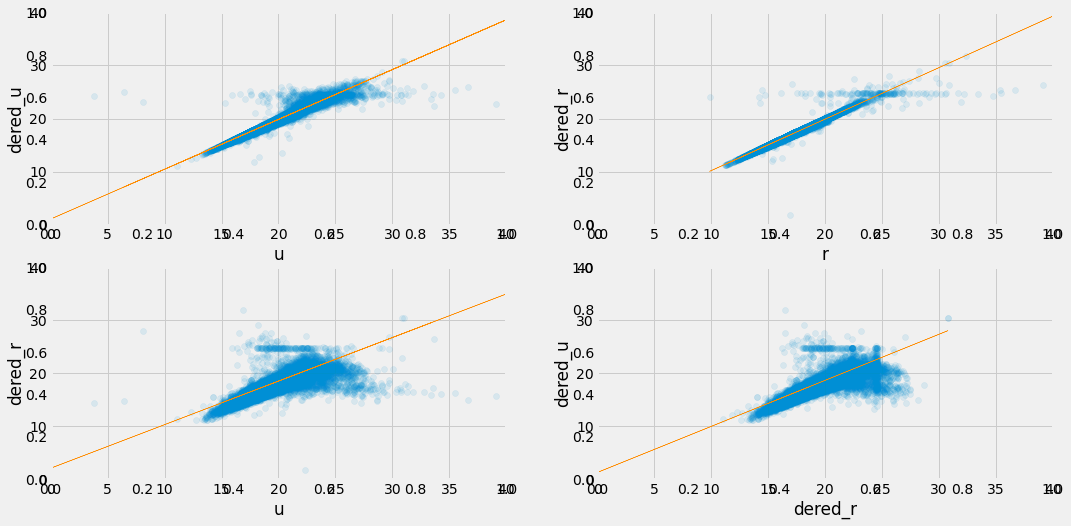

In [141]:
#시각화

fig, ax = plt.subplots(ncols=2, nrows =2)

ax[0][0] = fig.add_subplot(221)
ax[0][1] = fig.add_subplot(223)
ax[1][0] = fig.add_subplot(222)
ax[1][1] = fig.add_subplot(224)

ax[0][0].scatter(Xuu, Yuu, alpha=.1)
ax[0][0].plot(Xuu, theta[0] + theta[1] * xuu, color='darkorange', linewidth=.5)
ax[0][0].set_xlim([0, 40])
ax[0][0].set_ylim([0, 40])
ax[0][0].set_xlabel('u')
ax[0][0].set_ylabel('dered_u')

ax[0][1].scatter(Xudr, Yudr, alpha=.1)
ax[0][1].plot(Xudr, theta[4] + theta[5] * xudr, color='darkorange', linewidth=.5)
ax[0][1].set_xlim([0, 40])
ax[0][1].set_ylim([0, 40])
ax[0][1].set_xlabel('u')
ax[0][1].set_ylabel('dered_r')


ax[1][0].scatter(Xrr, Yrr, alpha=.1)
ax[1][0].plot(Xrr, theta[2] + theta[3] * xrr, color='darkorange', linewidth=.5)
ax[1][0].set_xlim([0, 40])
ax[1][0].set_ylim([0, 40])
ax[1][0].set_xlabel('r')
ax[1][0].set_ylabel('dered_r')

#ax[1][1].figure(figsize=(8, 8))
#ax[1][0].subplot(224)
ax[1][1].scatter(Xdudr, Ydudr, alpha=.1)
ax[1][1].plot(Xdudr, theta[6] + theta[7] * xdudr, color='darkorange', linewidth=.5)
ax[1][1].set_xlim([0, 40])
ax[1][1].set_ylim([0, 40])
ax[1][1].set_xlabel('dered_r')
ax[1][1].set_ylabel('dered_u')


<h3> Scikit-Learn을 이용한 로지스틱 회귀</h3>

In [147]:
X = trn[trn['class'] != 0].drop('class', axis=1)
y = trn[trn['class'] != 0]['class'].values - 1

In [148]:
np.unique(y)

array([0, 1], dtype=int64)

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score

lr = LogisticRegression()
lr.fit(X, y)
p = lr.predict_proba(X)[:, 1]

In [150]:
lr.coef_, lr.intercept_


(array([[ 0.81616212,  0.08464392, -1.87162654,  0.51454701, -0.54830475,
         -1.58484209,  2.2604413 , -0.0546294 , -1.36195321,  0.57621235,
         -0.60078908,  0.08330602, -0.10049235, -0.14093052, -0.14356047,
         -0.13844518, -0.13967095, -0.14222821]]),
 array([0.22171237]))

In [151]:
log_loss(y, p)


0.3656283635165419

In [152]:
roc_auc_score(y, p)


0.8761097334943841

In [159]:
from kaggler.metrics import plot_roc_curve, plot_pr_curve

In [157]:
!pip3 install -U kaggler

  Using cached Kaggler-0.8.11.tar.gz (885 kB)


  Created wheel for kaggler: filename=Kaggler-0.8.11-cp38-cp38-win_amd64.whl size=547921 sha256=cf1e22e4cfb8a60e80acc3d34233ab327f0c99d25d3a81b296b0a270e2acf7d2
  Stored in directory: c:\users\inhoinno\appdata\local\pip\cache\wheels\e8\a9\c8\19d7d2edfa1a74d1ae25c81c2746d02bc7f00343c8f004828f
Successfully built kaggler


Text(0.5, 1.0, 'Precision-Recall Curve')

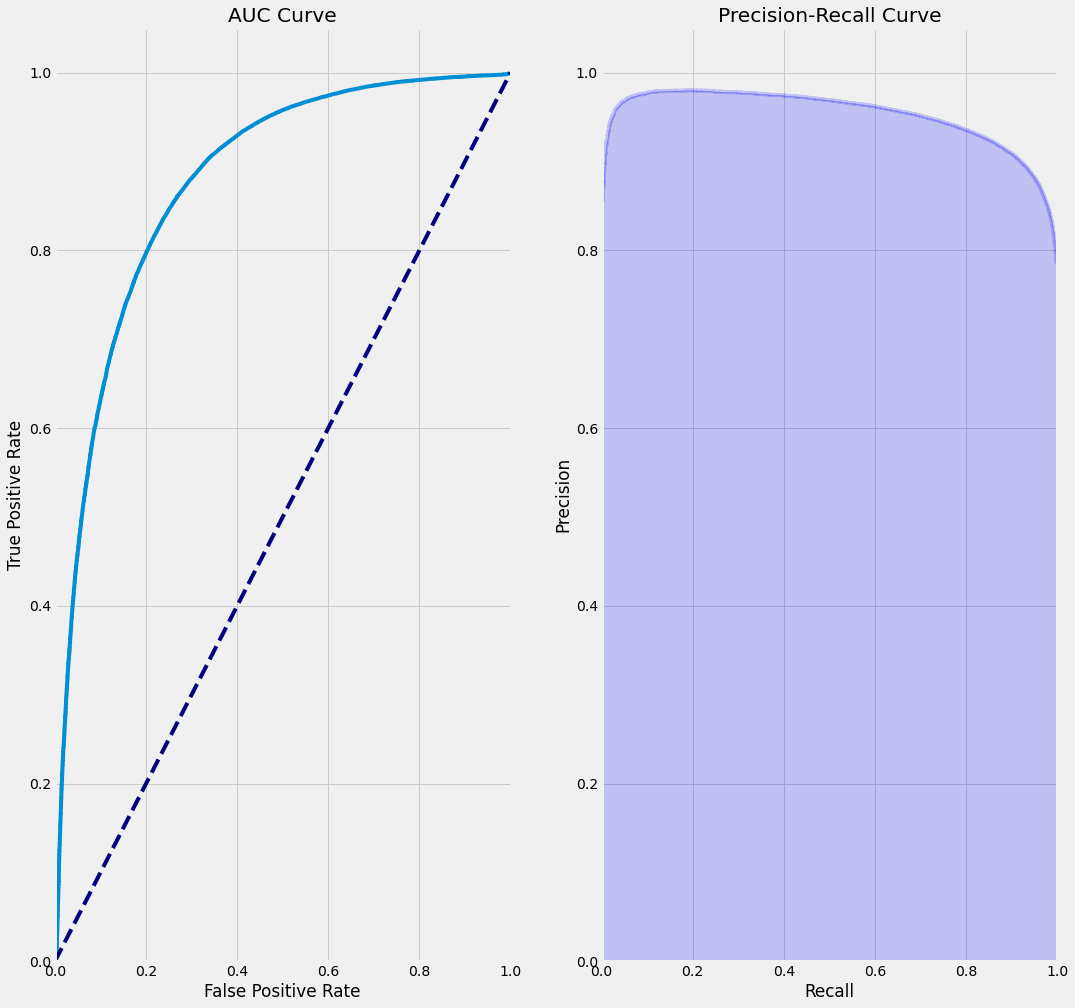

In [160]:
plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plot_roc_curve(y, p);
plt.title('AUC Curve')
plt.subplot(1, 2, 2)
plot_pr_curve(y, p);
plt.title('Precision-Recall Curve')